# Aula 4 - Regressão Logística

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão logística
- 4) Métricas de performance para problemas de classificação

____
____
____

## 1) Introdução

**Problemas de classificação** são aqueles em que queremos determinar a que **categoria ou classe** dentro de um **conjunto discreto de classes** uma dada observação pertence, com base em suas features.

Para isso, construímos um **classificador**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas).

> Principal diferença entre problemas de regressão e classificação:
> - Regressão: valores contínuos;
> - Classificação: valores (classes) discretas (binárias ou não).

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>

<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Problemas de classificação são comumente divididos com relação ao **número de classes** a serem preditas (isto é, com relação à estrutura do espaço de target):

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: $n$ classes (0, 1, ..., $n-1$), com $n > 2 \in \mathbb{N}$

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e importantes classificadores: a **Regressão Logística!**

___
___
___

## 2) Regressão Logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um método que aplicaremos a problemas de classificação!

O objetivo da regressão logística é: **modelar a probabilidade $P(\vec{x})$ de dada observação (com features $\vec{x}$) pertencer à classe 1**, ou seja, queremos modelar:

$$ P( y = 1 | \vec{x}) $$

Naturalmente, $0 \le P(\vec{x}) \le 1$. 

> Lembre-se que: $ P( y = 0 | \vec{x}) = 1 - P( y = 1 | \vec{x}) $

Uma vez que tivermos uma função que modele a probabilidade acima, podemos tomar a decisão de classificação da seguinte maneira:

- $P(\vec{x}) \ge 0,5$: x pertence à classe 1
- $P(\vec{x}) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora seja comum fixá-lo em 50%!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
</figure> 

Um exemplo de tal função é a **função logística** ou **função sigmoidal**:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note que:

- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = b_0 + b_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">

No nosso caso, como queremos modelar probabilidades, a função acima é exatamente a **hipótese** do estimador de regressão logística! Isto é,

$$f_{H, \vec{b}}(x) = P(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

Ou, para a regressão logística múltipla com $p$ features $\vec{x} = x_1, \cdots, x_p$:

$$f_{H, \vec{b}}(\vec{x}) = P(\vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

Com um pouco de álgebra, é possível mostrar que: 

$ b_0 + b_1 x_1 + \cdots + b_p x_p = \log \left ( \frac{P}{1-P} \right ) $

A quantidade $\frac{P}{1-P}$ é conhecida como **odds/chance**; e $\log \left ( \frac{P}{1-P} \right )$ é o [log-odds ou logit](https://en.wikipedia.org/wiki/Logit).

Note, portanto, que podemos entender a regressão logística como um modelo em que **o logit é linear com as features**. Portanto, de fato, a regressão logística é **um modelo linear**.

In [1]:
# imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Na regressão logística, nosso conjunto de hipóteses é: $\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.

O objetivo do algoritmo de aprendizagem será, como sempre, determinar qual é o vetor de parâmetros $\vec{b}$ que produz uma função $ $ que **melhor se ajusta aos dados**.

Para ilustrar este ponto novamente, vamos produzir a seguir algumas das infinitas funções de $\mathcal{H}$:

In [2]:
#Função sigmoide
def sigmoid(x):
    
    return 1/(1 + np.exp(-x))

In [3]:
#Hipótese linear
def hipot_lin(x, b0, b1):
    
    return b0 + b1*x

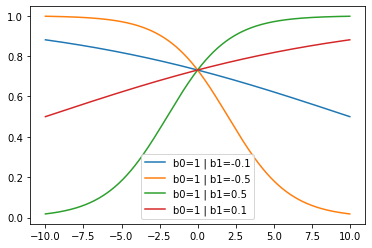

In [4]:
x = np.linspace(-10, 10, 1000)

b0 = 1
b1_list = [-0.1, -0.5, 0.5, 0.1]

for b1 in b1_list:
    
    y = sigmoid(hipot_lin(x, b0, b1))

    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

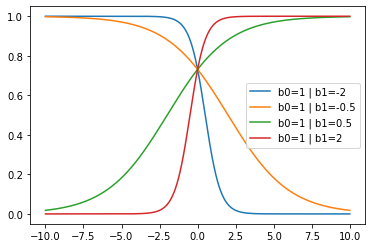

In [5]:
x = np.linspace(-10, 10, 1000)

b0 = 1
b1_list = [-2, -0.5, 0.5, 2]

for b1 in b1_list:
    
    y = sigmoid(hipot_lin(x, b0, b1))

    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

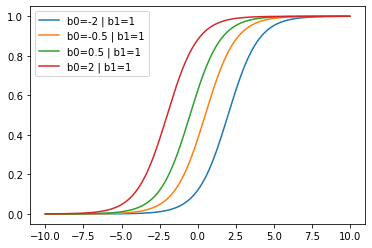

In [6]:
x = np.linspace(-10, 10, 1000)

b1 = 1
b0_list = [-2, -0.5, 0.5, 2]

for b0 in b0_list:
    
    y = sigmoid(hipot_lin(x, b0, b1))

    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

### Exemplo de um problema de classificação:

Dada a pontuação de um time no campeonato brasileiro, queremos prever se esse time será rebaixado ou não. Para esta tarefa, temos dados históricos com a pontuação de outros times (vetor X) e a condição deles ao final do campeonato, rebaixado ou não (vetor y). Podemos perceber pelo plot da feature (X) com o target (y) que uma função logística parece se ajustar bem a esse conjunto de dados.

* Feature (X): Pontuação no campeonato
* Target (y) : Rebaixado - 0, Não rebaixado - 1

Plotando os dados:

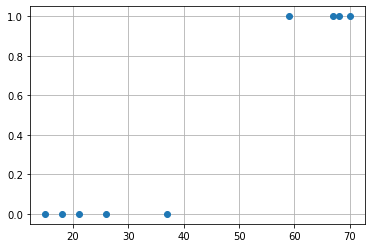

In [7]:
X = [15,70,26,68,59,37,18,21,67]
y=[0,1,0,1,1,0,0,0,1]

plt.plot(X,y,'o');
plt.grid()

Avaliando possibilidades:

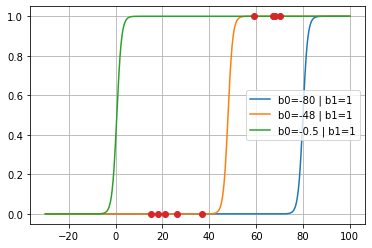

In [8]:
x = np.linspace(-30, 100, 1000)

b1 = 1
b0_list = [-80, -48, -0.5]

for b0 in b0_list:
    
    y = sigmoid(hipot_lin(x, b0, b1))

    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

X = [15,70,26,68,59,37,18,21,67]
y=[0,1,0,1,1,0,0,0,1]
plt.plot(X,y,'o');
plt.grid()
plt.show()

Utilizando o modelo escolhido:

y  predito:0.12


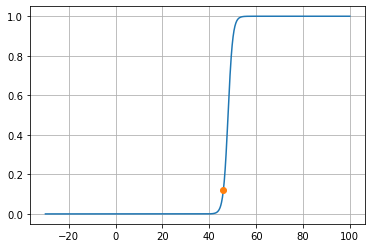

In [9]:
# X de teste e y predito
X_test = 46
b0 = -48
b1 = 1
y_predict = sigmoid(hipot_lin(X_test, b0, b1))

#X e Y de treino
x = np.linspace(-30, 100, 1000)
y = sigmoid(hipot_lin(x, b0, b1))


#Plotando o resultado
print(f'y  predito:{y_predict:.2f}')
plt.plot(x, y)
plt.plot(X_test,y_predict,'o')
plt.grid()
plt.show()

O que é esse valor de y? De acordo com nosso modelo, o time seria rebaixado?

___

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training)

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 

Para maiores detalhes sobre o algoritmo de aprendizagem, veja [este vídeo](https://youtu.be/yIYKR4sgzI8) e [esta série de vídeos](https://youtu.be/vN5cNN2-HWE), do ótimo canal StatQuest!


_________

__________________

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clicará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clicará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clicar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clicar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

___
___
___

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [10]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# pd.set_option("display.float_format", lambda x: f"{x}:.3f")

np.set_printoptions(suppress=True, precision=3)

Alguma observação notável?

In [11]:
#Leitura da base de dados
df = pd.read_csv("advertising.csv")

Verificando o dataframe

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#Histograma do target
sns.histplot(df, x="Clicked on Ad");

Temos um dataset balanceado no target, o que é __bem raro na vida real!__

Um dataset desbalanceado pode causar sérios problemas de performance ao modelo! Há várias técnicas para lidar com tal problema, mas, neste primeiro exemplo, não nos preocuparemos com isso...

In [ ]:
# façam EDA em casa - analisem a base a fundo!!!

Analisando as distribuições das features

In [ ]:
#Selecionando apenas colunas que contenham números
df.select_dtypes(include=np.number)

In [ ]:
#Excluindo a coluna target
df.select_dtypes(include=np.number).columns[:-1]

In [ ]:
#Histograma de cada feature
for col in df.select_dtypes(include=np.number).columns[:-1]:
    
    sns.histplot(data=df, x=col)
    
    plt.show()

Análise de cada feature dividida por target

In [ ]:
#Histograma dividido pelo target

for col in df.select_dtypes(include=np.number).columns[:-1]:
    
    sns.histplot(data=df, x=col, hue="Clicked on Ad")
    
    plt.show()

In [ ]:
#pairplot
sns.pairplot(df, hue="Clicked on Ad")

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

Vamos começar a construir o modelo?

In [12]:
# modelo baseline - utilizaremos todas as features numericos

df_model = df.select_dtypes(include=np.number)

In [13]:
# tbm nao temos dados nulos, então não precisamos nos preocupar com isso
# ja podemos treinar o modelo!

df_model.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
dtype: int64

In [14]:
# base final pra modelagem

df_model

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.950,35,61833.900,256.090,0,0
1,80.230,31,68441.850,193.770,1,0
2,69.470,26,59785.940,236.500,0,0
3,74.150,29,54806.180,245.890,1,0
4,68.370,35,73889.990,225.580,0,0
...,...,...,...,...,...,...
995,72.970,30,71384.570,208.580,1,1
996,51.300,45,67782.170,134.420,1,1
997,51.630,51,42415.720,120.370,1,1
998,55.550,19,41920.790,187.950,0,0


In [16]:
#Definindo X e y
X = df_model.drop(columns='Clicked on Ad')
y = df_model['Clicked on Ad']

In [17]:
# 1) importar o estimador

from sklearn.linear_model import LogisticRegression

In [18]:
# 2) instaciar o estimador (escolhendo os hiperparametros!)
# modelo baseline: esoclhemos hiperparametros default
logit = LogisticRegression()

In [19]:
# 3) train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# 4) treino com .fit, dados de treino
logit.fit(X_train, y_train)

LogisticRegression()

__Modelo treinado!__

$$f_{H, \vec{b}}(\vec{x}) = P(y=1 | \vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

Vamos ver os coeficientes do modelo:

In [21]:
#Intercepto
logit.intercept_

array([0.005])

In [22]:
#Nomes das colunas
X_train.columns.tolist()

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Male']

In [23]:
#Coeficientes
logit.coef_

array([[-0.056,  0.266, -0.   , -0.027,  0.002]])

Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($b_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($b_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

______
_____
_____
____

In [ ]:
#X_test
X_test

In [ ]:
#y_test
y_test

In [24]:
#Predict com os dados de teste
y_predict = logit.predict(X_test)
y_predict[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [25]:
#Target real
y_test[:10]

521    1
737    1
740    1
660    1
411    0
678    0
626    0
513    1
859    0
136    1
Name: Clicked on Ad, dtype: int64

## 3) Métricas de performance para problemas de classificação

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (TP): classificação correta da classe positivo;
- Verdadeiros Negativos (TN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo. Lembram do teste de hipóteses?
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Além disso, temos as seguintes métricas numéricas de avaliação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=500>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, uma métrica que em muitos casos é interessante de ser otimizada é o F1! 

<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="600">

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

Especificidade e sensibilidade:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Sensitivity_and_specificity_1.01.svg/341px-Sensitivity_and_specificity_1.01.svg.png width=500>

_______

Um ponto muito importante é que o método `predict()` se utiliza do cutoff igual a 0.5 para tomar a decisão! Veremos mais detalhes sobre isso mais a frente. Por enquanto, vamos seguir com a avaliação do modelo com este cutoff padrão!

In [26]:
y_pred = logit.predict(X_test)

In [27]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibiliza estas funcionalidades:

In [28]:
#confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

array([[140,   6],
       [ 25, 129]], dtype=int64)

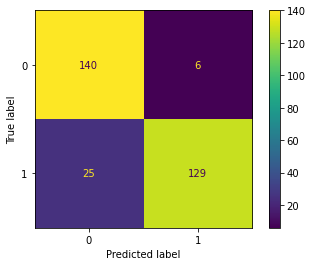

In [29]:
#ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_predict);

Matriz de confusão percentual

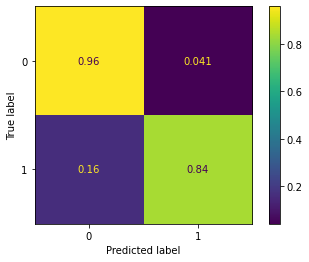

In [30]:
#ConfusionMatrixDisplay normalize
ConfusionMatrixDisplay.from_predictions(y_test,y_predict,normalize='true');

In [31]:
# support
y_test.value_counts()

1    154
0    146
Name: Clicked on Ad, dtype: int64

Função classification report

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



A classe positiva é a classe de interesse. Não necessariamente vai ser a classe representada pelo 1.

In [33]:
#Podemos salvar como um dicionário
cr_dict = classification_report(y_test,y_predict,output_dict=True)

In [34]:
#keys
cr_dict.keys()

dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])

In [36]:
#Resultado de uma classe
cr_dict['1']

{'precision': 0.9555555555555556,
 'recall': 0.8376623376623377,
 'f1-score': 0.8927335640138409,
 'support': 154}

In [ ]:
# Precision de uma classe
cr_dict['1']['precision']

In [ ]:
#Precision score
from sklearn.metrics import precision_score

precision_score(y_test,y_predict)

In [ ]:
cr_dict['0']['precision']

In [ ]:
#Alterando a classe positiva no precision_score
precision_score(y_test,y_predict,pos_label=0)

Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

_________________

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn proporciona é o método `predict_proba()`

Esse método retorna exatamente qual é a **probabilidade modelada pelo logit**, isto é, $P(y=1 | \vec{x})$.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o cutoff de escolha de classe** para ser algo diferente de 0.5!


In [37]:
#Predict
logit.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [38]:
#Classes
logit.classes_

array([0, 1], dtype=int64)

In [39]:
probas = logit.predict_proba(X_test)

In [40]:
# Apresentar a probabilidade para cada classe
y_proba_0 = probas[:,0]

# isso é o que modelamos explicitamente com o logit!
y_proba_1 = probas[:,1]

In [41]:
cutoff = 0.8

# np.where(condicao, substituir caso True, substituir caso False)
# pras observações cuja probabilidade de ser da classe 1 for maior que o cutoff,
# eu atribuo o target 1. caso contrario, o target 0.

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)

In [42]:
cutoff = 0.5

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)

pd.Series(y_pred_proba).value_counts()

0    165
1    135
dtype: int64

In [43]:
cutoff = 0.9

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)

pd.Series(y_pred_proba).value_counts()

0    202
1     98
dtype: int64

In [44]:
cutoff = 0.05

y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)

pd.Series(y_pred_proba).value_counts()

1    217
0     83
dtype: int64

Vamos avaliar diferentes cutoffs...

Coeficientes:
 [[-0.056  0.266 -0.    -0.027  0.002]]

Intercept: [0.005]

Classes: [0 1]

###################################################

Avaliação de modelos com diferentes valores de cutoff

###################################################


 Cutoff: 0.05

Matriz de confusão do modelo nos dados de teste:
[[ 78  68]
 [  5 149]]


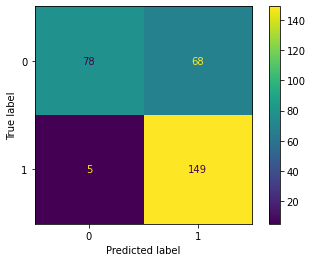


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.94      0.53      0.68       146
           1       0.69      0.97      0.80       154

    accuracy                           0.76       300
   macro avg       0.81      0.75      0.74       300
weighted avg       0.81      0.76      0.74       300


##########################################################


 Cutoff: 0.1

Matriz de confusão do modelo nos dados de teste:
[[111  35]
 [  7 147]]


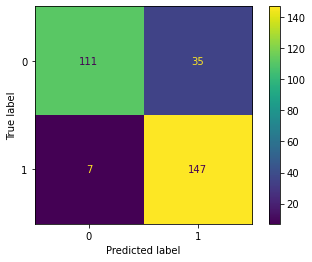


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       146
           1       0.81      0.95      0.88       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


##########################################################


 Cutoff: 0.2

Matriz de confusão do modelo nos dados de teste:
[[127  19]
 [ 13 141]]


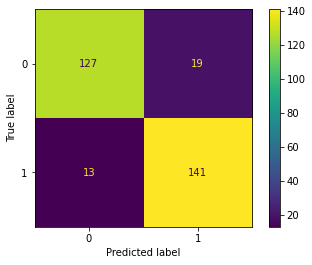


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################


 Cutoff: 0.3

Matriz de confusão do modelo nos dados de teste:
[[133  13]
 [ 17 137]]


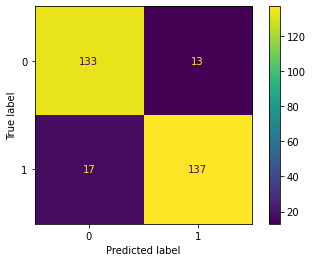


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.91      0.89      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################


 Cutoff: 0.4

Matriz de confusão do modelo nos dados de teste:
[[136  10]
 [ 23 131]]


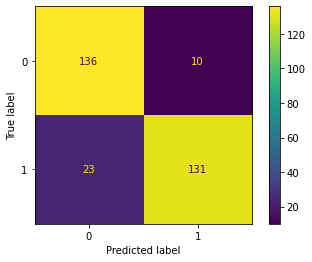


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.85      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################


 Cutoff: 0.5

Matriz de confusão do modelo nos dados de teste:
[[140   6]
 [ 25 129]]


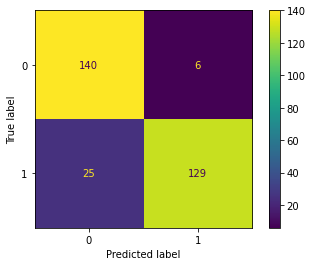


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################


 Cutoff: 0.6

Matriz de confusão do modelo nos dados de teste:
[[141   5]
 [ 34 120]]


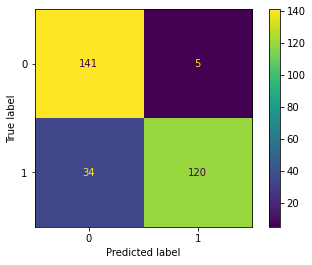


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       146
           1       0.96      0.78      0.86       154

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


##########################################################


 Cutoff: 0.7

Matriz de confusão do modelo nos dados de teste:
[[144   2]
 [ 38 116]]


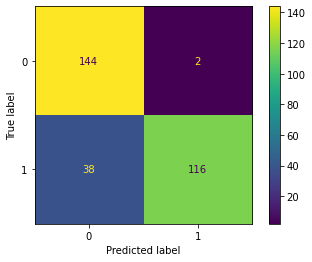


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       146
           1       0.98      0.75      0.85       154

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300


##########################################################


 Cutoff: 0.8

Matriz de confusão do modelo nos dados de teste:
[[144   2]
 [ 42 112]]


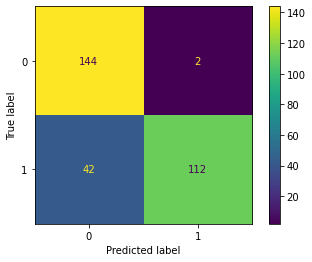


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.85       300
   macro avg       0.88      0.86      0.85       300
weighted avg       0.88      0.85      0.85       300


##########################################################


 Cutoff: 0.9

Matriz de confusão do modelo nos dados de teste:
[[145   1]
 [ 57  97]]


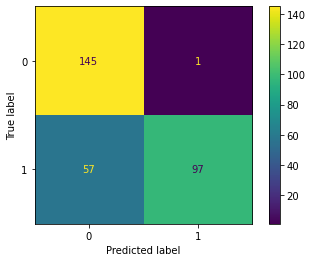


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       146
           1       0.99      0.63      0.77       154

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.86      0.81      0.80       300


##########################################################


 Cutoff: 0.95

Matriz de confusão do modelo nos dados de teste:
[[146   0]
 [ 70  84]]


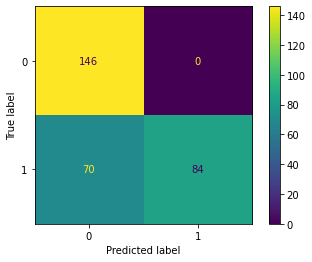


Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.55      0.71       154

    accuracy                           0.77       300
   macro avg       0.84      0.77      0.76       300
weighted avg       0.84      0.77      0.75       300


##########################################################



In [45]:
# leia a base
df = pd.read_csv("advertising.csv")

# apenas as features numericas
df = df.select_dtypes(include=[np.number])

# separe as features e o target
X = df.drop(columns = 'Clicked on Ad')
y = df['Clicked on Ad']

# 1) importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# 2) instancie a classe
estimador = LogisticRegression()

# 3) faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# 4) treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
classes =  modelo.classes_
print("\nClasses:", classes)

# 5) probabilidades das previsões
probs = modelo.predict_proba(X_test)

# probabilidade de pertencimento à classe 1
probs_1 = probs[:, 1]

# avaliação  do modelo
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# cutoffs
threshold_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

print("\n###################################################\n")
print("Avaliação de modelos com diferentes valores de cutoff")
print("\n###################################################\n")

for threshold in threshold_list:
    
    print("\n Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_1 >= threshold, 1, 0)

    print("\nMatriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis")
    plt.show()

    print("\nClassification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

_________

### Tradeoff precision/recall

Conforme é possível ver acima, claramente há um **tradeoff** entre precision e recall conforme variamos o cutoff. Isso faz total sentido, dado que estas métricas representam!

Podemos visualizar este tradeoff facilmente com o sklearn:

In [46]:
from sklearn.metrics import precision_recall_curve

#Considerando a classe 1 como positiva
y_proba_1 = logit.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)

Os arrays contendo os resultados de precision e recall possuem um elemento a mais, pois o SKLearn incluí os valores de precision e recall 1 e 0 respectivamente e eles não possuem um limiar correspondente.

In [47]:
thresholds.shape, recalls.shape, precisions.shape

((267,), (268,), (268,))

In [48]:
precisions_recalls = pd.DataFrame(data={'precisions':precisions[:-1], 
                                        'recalls':recalls[:-1], 'thresholds':thresholds})
precisions_recalls

,precisions,recalls,thresholds
0,0.577,1.000,0.020
1,0.575,0.994,0.020
2,0.577,0.994,0.020
3,0.580,0.994,0.020
4,0.578,0.987,0.021
...,...,...,...
262,1.000,0.032,0.999
263,1.000,0.026,0.999
264,1.000,0.019,0.999
265,1.000,0.013,0.999


Retornando os dados para valores de precision maiores que 0.9:

In [51]:
precisions_recalls[precisions_recalls['precisions']>=0.919]

,precisions,recalls,thresholds
118,0.919,0.890,0.312
123,0.924,0.864,0.386
124,0.923,0.857,0.386
125,0.923,0.851,0.398
126,0.929,0.851,0.422
...,...,...,...
262,1.000,0.032,0.999
263,1.000,0.026,0.999
264,1.000,0.019,0.999
265,1.000,0.013,0.999


Podemos verificar para qual threshold temos precision igual a recall:

In [52]:
precisions_recalls[precisions_recalls['precisions']==precisions_recalls['recalls']]

,precisions,recalls,thresholds
113,0.896,0.896,0.249


Para plotar:

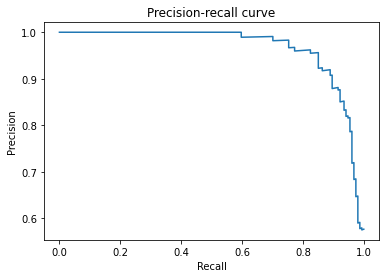

In [53]:
plt.title("Precision-recall curve")

plt.plot(recalls, precisions)

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.show()

Curva Precision Recall passando o modelo e os dados de teste:

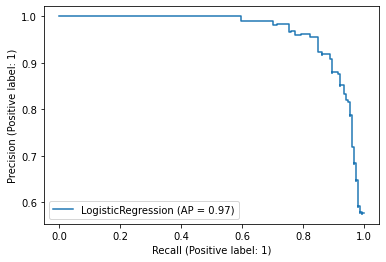

In [59]:
# PrecisionRecallDisplay (from_estimator)
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(logit, X_test, y_test);

Curva Precision Recall passando os targets reais e as previsões:

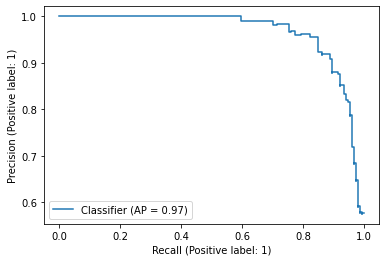

In [61]:
# PrecisionRecallDisplay (from_predictions)
y_proba_1 = logit.predict_proba(X_test)[:,1]
PrecisionRecallDisplay.from_predictions(y_test,y_proba_1);

A precisão média (AP) resume tal gráfico como a média ponderada dos valores de Precision alcançadas em cada threshold, com o aumento do recall do threshold anterior usado como peso:

$$AP = \sum_n (R_n - R_{n-1})P_n$$

________

### Curva ROC e AUC-ROC (AUROC)

Veremos agora uma outra métrica de avaliação de modelos de classificação que é intimamente ligada com os diferentes thresholds possíveis -- a **AUC (Area Under The Curve) da curva ROC (Receiver Operating Characteristics)**, por vezes chamada de **AUROC (Area Under the Receiver Operating Characteristics)**

A curva **ROC é uma curva de probabilidade**, sendo que **AUC é a área sob a curva**, representando **o grau de separabilidade atingido pelo modelo**.

Ou seja, esta medida nos diz **o quanto o modelo é capaz de distinguir entre duas classes**.

A curva ROC é construída com a **taxa de falsos positivos** no eixo x, e a **taxa de verdadeiros positivos** no eixo y, para diferentes **thresholds de classificação**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

* A True Positive Rate (TPR, também conhecisa como Recall) é calculada como $\frac{TP}{TP+FN}$

* A False Positive Rate (FPR) é calculada como $\frac{FP}{FP+TN}$

O valor do AUC-ROC sempre estará **entre 0 e 1**, sendo que **quanto mais próximo de 1, melhor o modelo**.

> Valores de AUC-ROC maiores que 0.5 (mais próximos de 1) significam que o modelo tem uma **taxa de veridadeiros positivos maior que a taxa de falsos positivos**, ou seja, o modelo está acertando mais!

Quanto **mais próximo de 0** (para valores abaixo de 0.5), teremos um modelo que faz um bom trabalho em separar as classes, mas as classifica erroneamente.

E, quanto **mas próximo de 0.5**, pior é o modelo em separar as classes: seria um modelo que simplesmente chuta aleatoriamente ora a classe 0, ora a classe 1. Veja as imagens a seguir para uma ilustração:

<img src="https://miro.medium.com/max/528/1*Uu-t4pOotRQFoyrfqEvIEg.png" width=500>


<img src="https://miro.medium.com/max/507/1*yF8hvKR9eNfqqej2JnVKzg.png" width=500>


<img src="https://miro.medium.com/max/430/1*iLW_BrJZRI0UZSflfMrmZQ.png" width=500>


<img src="https://miro.medium.com/max/556/1*aUZ7H-Lw74KSucoLlj1pgw.png" width=500>

Ao olhar para a curva em si, temos a seguinte interpretação:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

Para aprender mais sobre a construção da curva ROC, sugiro [este StatQuest!](https://www.youtube.com/watch?v=4jRBRDbJemM)

In [62]:
# roc_curve sklearn
from sklearn.metrics import roc_curve

fpr, tpr, thrsholds = roc_curve(y_test, y_proba_1)

Para plotar:

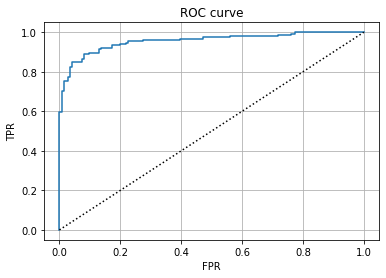

In [64]:
plt.title("ROC curve")

plt.plot(fpr, tpr)

plt.xlabel("FPR")
plt.ylabel("TPR")

x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.grid()

plt.show()

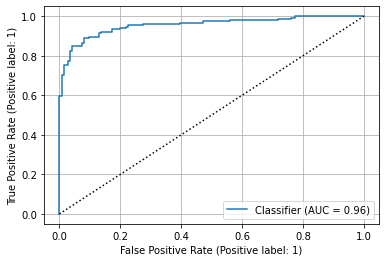

In [66]:
#RocCurveDisplay
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)

x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.grid()

plt.show()

Por fim, pra calcular o AUC-ROC:

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_1)

0.9559242127735279

___
___
___

### E se tivermos uma classificação multiclasse?

Há problemas em que temos um problema de **classificação multiclasse**, pois há mais do que duas classes a serem preditas.

<img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png">

Boa noitícia: o operacional de construção e avaliação do modelo com o sklearn muda em absolutamente **nada**.

No entanto, conceitualmente, há algumas mudanças: a rigor, o modelo passa a se chamar **regresão logística MULTINOMIAL**, cujo processo de classificação é dado pela função **softmax**:

<img src="https://i.stack.imgur.com/YLeRi.png" width=600>

Para quem quiser saber mais sobre o "logit score", [clique aqui](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun).

Essencialmente, esse é o valor do termo linear usado como argumento da sigmoide, isto é, $z(x) = b_0 + b_1 x_1 + \cdots + b_p x_p$

In [68]:
logit.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], d

In [69]:
#Resultado da classe escolhida vai ser dado pela maior probabilidade
logit.predict_proba(X_test)

array([[0.506, 0.494],
       [0.003, 0.997],
       [0.05 , 0.95 ],
       [0.01 , 0.99 ],
       [0.97 , 0.03 ],
       [0.715, 0.285],
       [0.977, 0.023],
       [0.009, 0.991],
       [0.691, 0.309],
       [0.052, 0.948],
       [0.981, 0.019],
       [0.091, 0.909],
       [0.003, 0.997],
       [0.976, 0.024],
       [0.082, 0.918],
       [0.006, 0.994],
       [0.001, 0.999],
       [0.032, 0.968],
       [0.907, 0.093],
       [0.01 , 0.99 ],
       [0.907, 0.093],
       [0.013, 0.987],
       [0.006, 0.994],
       [0.985, 0.015],
       [0.98 , 0.02 ],
       [0.005, 0.995],
       [0.991, 0.009],
       [0.985, 0.015],
       [0.009, 0.991],
       [0.269, 0.731],
       [0.983, 0.017],
       [0.331, 0.669],
       [0.964, 0.036],
       [0.143, 0.857],
       [0.002, 0.998],
       [0.929, 0.071],
       [0.975, 0.025],
       [0.889, 0.111],
       [0.135, 0.865],
       [0.02 , 0.98 ],
       [0.986, 0.014],
       [0.081, 0.919],
       [0.976, 0.024],
       [0.0